In [0]:
#sistema de controle Fuzzy
#Problema: Controle de Pragas
#Bruno Ferreira da Paixão 
#Introdução a Inteligência Artificial 
#Matrícula: 1831143052
#Trabalho de Recuperação

In [28]:
#instalar biblioteca 
!pip install -U scikit-fuzzy


Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.6/dist-packages (0.4.1)


In [0]:
#Carregamento de Bibliotecas

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [0]:
#definição de variáveis 

#variáveis de entrada
tamanho_area = ctrl.Antecedent(np.arange(0,101,1), 'tamanho_area')
quantidade_de_praga = ctrl.Antecedent(np.arange(0,101,1), 'quantidade_de_praga')
#variável de saída
infestacao = ctrl.Antecedent(np.arange(0,101,1), 'infestacao')


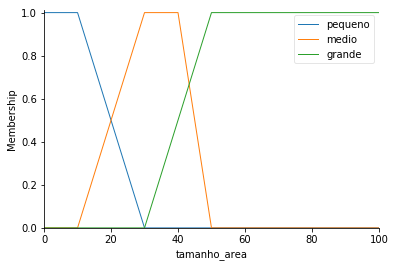

In [31]:
#definição variável tamanho da área 
tamanho_area['pequeno'] = fuzz.trapmf(tamanho_area.universe, [0,0,10,30])
tamanho_area['medio'] = fuzz.trapmf(tamanho_area.universe, [10,30,40,50])
tamanho_area['grande'] = fuzz.trapmf(tamanho_area.universe, [30,50,100,100])

tamanho_area.view()


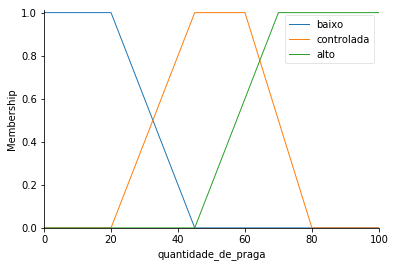

In [32]:
#definição variável quantidade de pragas
quantidade_de_praga['baixo'] = fuzz.trapmf(quantidade_de_praga.universe, [0,0,20,45])
quantidade_de_praga['controlada'] = fuzz.trapmf(quantidade_de_praga.universe, [20,45,60,80])
quantidade_de_praga['alto'] = fuzz.trapmf(quantidade_de_praga.universe, [45,70,120,120])

quantidade_de_praga.view()


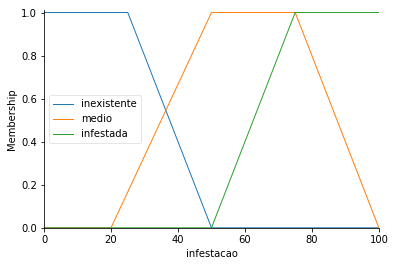

In [33]:
#definição da variável infestação
infestacao['inexistente'] = fuzz.trapmf(infestacao.universe, [0,0,25,50])
infestacao['medio'] = fuzz.trapmf(infestacao.universe, [20,50,75,100])
infestacao['infestada'] = fuzz.trapmf(infestacao.universe, [50,75,130,130])

infestacao.view()


In [0]:
'''
tamanho_area['pequeno'] 
tamanho_area['medio']
tamanho_area['grande']

quantidade_de_praga['baixo'] 
quantidade_de_praga['controlada'] 
quantidade_de_praga['alto'] 

infestacao['inexistente'] 
infestacao['medio'] 
infestacao['infestada']
'''
#definação de regras
regra1 = ctrl.Rule(tamanho_area['pequeno'] | quantidade_de_praga['baixo'], infestacao['inexistente'])
regra2 = ctrl.Rule(tamanho_area['medio'] | quantidade_de_praga['controlada'], infestacao['medio'])
regra3 = ctrl.Rule(tamanho_area['grande'] | quantidade_de_praga['alto'], infestacao['infestada'])
regra4 = ctrl.Rule(tamanho_area['pequeno'] | quantidade_de_praga['controlada'], infestacao['medio'])
regra5 = ctrl.Rule(tamanho_area['grande'] | quantidade_de_praga['controlada'], infestacao['medio'])
regra6 = ctrl.Rule(tamanho_area['medio'] | quantidade_de_praga['controlada'], infestacao['infestada'])



In [0]:
#sistema de controle
infestacao_crtl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6])
infestado_2 = ctrl.ControlSystemSimulation(infestacao_crtl)

In [0]:
#teste do modelo

#input
infestado_2.input['tamanho_area'] = 1200
infestado_2.input['quantidade_de_praga'] = 10000

#saida
infestado_2.compute()

#valor computado
infestado_2.output['infestacao']
infestacao.view(sim=infestado_2)

